<a href="https://colab.research.google.com/github/mobley-trent/kaggle/blob/master/tesla_stock_price_analysis_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![tesla-image](https://electrek.co/wp-content/uploads/sites/3/2021/05/Tesla-Logo-Hero.jpg?quality=82&strip=all&w=1024)

# TESLA STOCK PRICE ANALYSIS + PREDICTION WITH LSTM

Welcome to this Jupyter Notebook, where we will be exploring the historical stock prices of Tesla Inc. using Exploratory Data Analysis (EDA) techniques and then using a Long Short-Term Memory (LSTM) deep learning model to predict future stock prices.

In this notebook, we will first perform EDA on the Tesla stock prices dataset to understand the trends and patterns in the data. We will use various visualization techniques to gain insights and identify any significant events that may have affected the stock prices.

Next, we will use a LSTM deep learning model to predict future stock prices. LSTMs are a type of Recurrent Neural Network (RNN) that are well-suited for time series data, making them a good choice for stock price prediction.

Throughout this notebook, we will be working with the Python programming language and several popular libraries such as Pandas, Numpy, Matplotlib, Plotly and Keras.

We will start by loading and preprocessing the data before diving into the EDA and modeling sections. We will also evaluate the performance of our model and interpret the results.

The goal of this project is to provide a comprehensive understanding of the stock prices of Tesla Inc. and to demonstrate the effectiveness of LSTM deep learning models for stock price prediction.

## LIBRARIES

**yfinance** is a Python library that allows for the easy download of historical stock prices and other financial data from Yahoo Finance. It provides a simple and convenient way to access financial data without the need for manual scraping or the use of other APIs.

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
from pandas_datareader.data import DataReader
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import requests
from bs4 import BeautifulSoup
from plotly.subplots import make_subplots
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

## EXPLORATORY DATA ANALYSIS

This block of code is used to download the historical stock data for Tesla Inc. from Yahoo Finance and store it in a Pandas DataFrame called tsla_data with a default sequential indexing. This data can be further used for exploratory data analysis or for training a model for stock prediction tasks.

In [ ]:
tesla_data = yf.Ticker('TSLA')

tsla_data = tesla_data.history(period='max')
tsla_data.reset_index(inplace=True)
tsla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


This code scrapes revenue data from another website, [Macrotrends](https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue)

In [ ]:
# using requests library to download the webpage
url='https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'

# Save the text of the response
html_text = requests.get(url).text

# Parse the html data using beautiful_soup.
soup=BeautifulSoup(html_text, 'html5lib')

# Using beautiful soup extract the table with Tesla Quarterly Revenue.
# creating new dataframe
tsla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

tables = soup.find_all('table')
table_index=0

for index, table in enumerate(tables):
    if ('Tesla Quarterly Revenue'in str(table)):
        table_index=index
        
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col!=[]):
        date =col[0].text
        # to remove comma and dollar sign
        revenue =col[1].text.replace("$", "").replace(",", "")
        tsla_revenue=tsla_revenue.append({'Date':date,'Revenue':revenue},
                                           ignore_index=True)
        
# removing null values
tsla_revenue = tsla_revenue[tsla_revenue['Revenue']!='']

In [ ]:
# Predefine a function for visualization

def plot_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price ($)", "Historical Revenue ($)"), vertical_spacing = .5)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($ Millions)", row=2, col=1)
    fig.update_layout(showlegend=False, height=1000, title=stock, xaxis_rangeslider_visible=True)
    fig.show()

In [ ]:
tsla_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Date          3163 non-null   datetime64[ns, America/New_York]
 1   Open          3163 non-null   float64                         
 2   High          3163 non-null   float64                         
 3   Low           3163 non-null   float64                         
 4   Close         3163 non-null   float64                         
 5   Volume        3163 non-null   int64                           
 6   Dividends     3163 non-null   float64                         
 7   Stock Splits  3163 non-null   float64                         
dtypes: datetime64[ns, America/New_York](1), float64(6), int64(1)
memory usage: 197.8 KB


In [ ]:
tsla_data.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [ ]:
tsla_data.describe(include='all')

<ipython-input-8-0cd1bc327cfd>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  tsla_data.describe(include='all')


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3163,3163.000000,3163.000000,3163.000000,3163.000000,3.163000e+03,3163.0,3163.000000
unique,3163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2010-06-29 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2010-06-29 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2023-01-20 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,59.112026,60.438513,57.644416,59.063361,9.396189e+07,0.0,0.002529
std,NaN,95.543574,97.739397,93.061025,95.414308,8.174256e+07,0.0,0.103664
min,NaN,1.076000,1.108667,0.998667,1.053333,1.777500e+06,0.0,0.000000
25%,NaN,9.056666,9.288333,8.833000,9.097000,4.245375e+07,0.0,0.000000


In [ ]:
plot_graph(tsla_data, tsla_revenue, 'Tesla Historical Share Price & Revenue')

This code only extracts data two years prior to the current date.

In [ ]:
tesla_data = yf.Ticker('TSLA')

end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

tsla_data = tesla_data.history(start=start, end=end)

tsla_data.reset_index(inplace=True)
tsla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-01-25 00:00:00-05:00,285.000000,300.133331,279.606659,293.600006,123520200,0.0,0.0
1,2021-01-26 00:00:00-05:00,297.126678,298.633331,290.533325,294.363342,69394800,0.0,0.0
2,2021-01-27 00:00:00-05:00,290.116669,297.166656,286.220001,288.053345,82002000,0.0,0.0
3,2021-01-28 00:00:00-05:00,273.333344,282.666656,267.000000,278.476654,79134000,0.0,0.0
4,2021-01-29 00:00:00-05:00,276.666656,280.803345,260.033325,264.510010,104972400,0.0,0.0


Moving averages are a commonly used tool in technical analysis for visualizing stock price data. They are used to smooth out the fluctuations in the data and to identify underlying trends in the stock price over a certain period of time.

In [ ]:
ma_days = [50, 100, 200]

for ma in ma_days:
    column_name = f"MA for {ma} days"
    tsla_data[column_name] = tsla_data['Close'].rolling(ma).mean()

cols = ["Close","MA for 50 days","MA for 100 days","MA for 200 days"]
fig = go.Figure()
for col in cols:
    fig.add_trace(go.Scatter(x=tsla_data.Date, y=tsla_data[col], name=col))

fig.update_layout(showlegend=False, height=1000, xaxis_rangeslider_visible=True)
fig.update_layout(title_text='Tesla Stock Price Moving Averages')
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Price ($)")
fig.show()

In [ ]:
tsla_data['Daily Return'] = tsla_data['Close'].pct_change()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=tsla_data.Date, y=tsla_data['Daily Return'], name="Daily Return",mode='lines'))
fig.update_layout(showlegend=False, height=1000, xaxis_rangeslider_visible=True)
fig.update_layout(title=f'Tesla Daily Return', xaxis_title='Date', yaxis_title='Pct Change')
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=tsla_data.Date, y=tsla_data['Daily Return'], name="Daily Return"))
fig.update_layout(showlegend=False, height=1000, xaxis_rangeslider_visible=True)
fig.update_layout(title=f'Tesla Daily Return', xaxis_title='Date', yaxis_title='Pct Change')
fig.show()

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=tsla_data.Date,
                open=tsla_data['Open'],
                high=tsla_data['High'],
                low=tsla_data['Low'],
                close=tsla_data['Close'],
                increasing_line_color='green',
                decreasing_line_color='red')])

fig.update_layout(showlegend=False, height=1000, xaxis_rangeslider_visible=True)
fig.update_layout(title=f'Tesla Pct Change', xaxis_title='Date', yaxis_title='Returns')
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=tsla_data['Daily Return'], name="Pct Change", nbinsx=30, marker=dict(color='rgb(0,0,255)')))
fig.update_layout(title=f'Tesla Pct Change Distribution', xaxis_title='Pct Change', yaxis_title='Frequency')
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=tsla_data['Daily Return'], name="Pct Change", nbinsx=30, marker=dict(color='rgb(0,0,255)')))
fig.add_trace(go.Histogram(x=tsla_data['Daily Return'], cumulative=dict(enabled=True), name="Cumulative"))
fig.update_layout(title=f'Tesla Pct Change Distribution', xaxis_title='Pct Change', yaxis_title='Frequency')
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=tsla_data['Daily Return'], name="Pct Change", histnorm='probability density'))
fig.add_trace(go.Scatter(x=tsla_data['Daily Return'], y=tsla_data['Daily Return'].value_counts().sort_index().values, name="density"))
fig.update_layout(title='Tesla Pct Change Distribution', xaxis_title='Pct Change', yaxis_title='Frequency')
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=tsla_data.Date, y=tsla_data['Close'], name='Closing Stock Price'))
fig.update_layout(showlegend=False, height=1000, xaxis_rangeslider_visible=True)
fig.update_layout(title_text='Tesla Closing Stock Price')
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Price ($)")
fig.show()

## DATA PREPROCESSING

In [ ]:
tesla_data = yf.Ticker('TSLA')
end = datetime.now()
start = datetime(end.year - 3, end.month, end.day)
tsla_data = tesla_data.history(start=start, end=end)
tsla_data.reset_index(inplace=True)

In [ ]:
# Choosing the output column
dataset = tsla_data['Open']
dataset = pd.DataFrame(dataset)

data = dataset.values
data.shape

(755, 1)

In [ ]:
# Normalizing Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

Splitting the data into train-test splits.

In [ ]:
train_size = int(len(data) * .8)
test_size = len(data) - train_size

print("Train Size :",train_size,"Test Size :",test_size)

train_data = scaled_data[ :train_size , 0:1 ]
test_data = scaled_data[ train_size-60: , 0:1 ]

Train Size : 604 Test Size : 151


In [ ]:
train_data.shape,test_data.shape

((604, 1), (211, 1))

In [ ]:
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train) # Convert to numpy array
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # Reshaping the input

In [ ]:
x_train.shape , y_train.shape

((544, 60, 1), (544,))

## LSTM MODEL

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Early Stopping Mechanism to minimize loss
callbacks = [EarlyStopping(monitor='loss', patience=10 , restore_best_weights=True)]

model.compile(optimizer = 'adam', loss = 'mse' , metrics="mean_absolute_error")
history = model.fit(x_train, y_train, batch_size=32, epochs=100, callbacks=callbacks)

Epoch 1/100
17/17 [==============================] - 5s 108ms/step - loss: 0.0481 - mean_absolute_error: 0.1588
Epoch 2/100
17/17 [==============================] - 2s 103ms/step - loss: 0.0066 - mean_absolute_error: 0.0663
Epoch 3/100
17/17 [==============================] - 2s 105ms/step - loss: 0.0035 - mean_absolute_error: 0.0451
Epoch 4/100
17/17 [==============================] - 2s 105ms/step - loss: 0.0031 - mean_absolute_error: 0.0409
Epoch 5/100
17/17 [==============================] - 2s 103ms/step - loss: 0.0030 - mean_absolute_error: 0.0398
Epoch 6/100
17/17 [==============================] - 2s 102ms/step - loss: 0.0028 - mean_absolute_error: 0.0380
Epoch 7/100
17/17 [==============================] - 2s 144ms/step - loss: 0.0027 - mean_absolute_error: 0.0374
Epoch 8/100
17/17 [==============================] - 4s 212ms/step - loss: 0.0025 - mean_absolute_error: 0.0362
Epoch 9/100
17/17 [==============================] - 3s 175ms/step - loss: 0.0023 - mean_absolute_error:

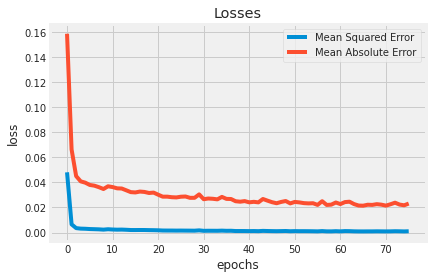

In [ ]:
# VISUALIZING MODEL PERFORMANCE

plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [ ]:
# Creating a test set
x_test = []
y_test = []

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

Now, we make predictions on the test dataset.

In [ ]:
predictions = model.predict(x_test)

#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

5/5 [==============================] - 1s 39ms/step


(151, 1)

In [ ]:
# ROOT MEAN SQUARED ERROR
y_test = scaler.inverse_transform([y_test])

RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

0.16

## VISUALIZATION OF THE PREDICTIONS

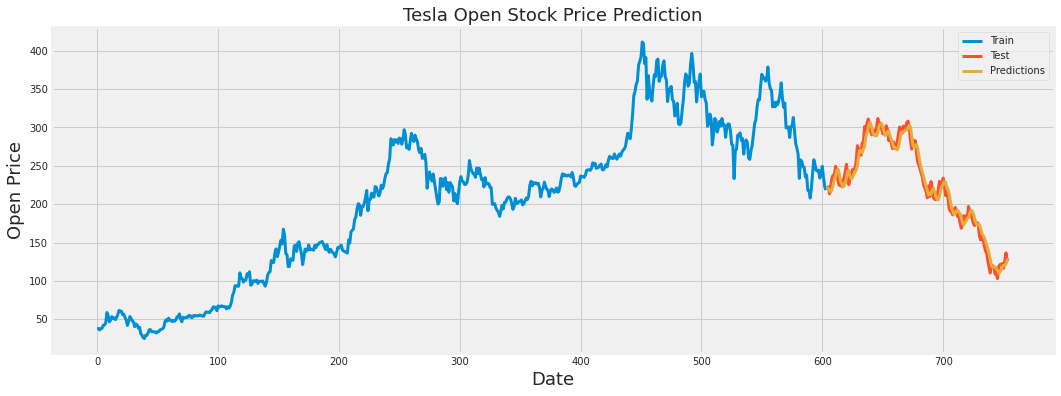

In [ ]:
train = dataset.iloc[:train_size , 0:1]
test = dataset.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Tesla Open Stock Price Prediction' , fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price' ,fontsize=18)
plt.plot(train['Open'],linewidth=3)
plt.plot(test['Open'],linewidth=3)
plt.plot(test["Predictions"],linewidth=3)
plt.legend(['Train','Test','Predictions'])